## Malaria Detection from Cell Images using Deep Learning

- Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable. Malaria causes symptoms that typically include fever, tiredness, vomiting, and headaches. In severe cases it can cause yellow skin, seizures, coma, or death.

Signs and symptoms
A malaria infection is generally characterized by the following signs and symptoms:

            Fever
            Chills
            Headache
            Nausea and vomiting
            Muscle pain and fatigue
            
Other signs and symptoms may include:

            Sweating
            Chest or abdominal pain
            Cough
            
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Symptoms_of_Malaria.png/848px-Symptoms_of_Malaria.png" height="150px" width="350px">

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 416 images belonging to 2 classes.


In [3]:
# Preprocessing the Validation
validate_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validate_datagen.flow_from_directory('Dataset/test',
                                                        target_size = (224, 224),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 134 images belonging to 2 classes.


In [5]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

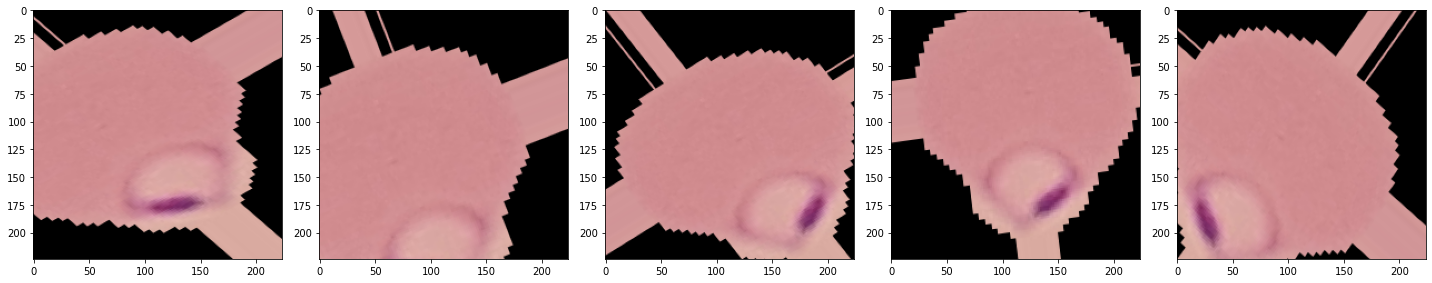

In [6]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [8]:
import tensorflow_hub as hub 

In [9]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [10]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [11]:
mobile_net.trainable = False

In [12]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit_generator(
    training_set,
    epochs=5,
    validation_data=validation_set 
    )

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
13/13 [==============================] - 42s 3s/step - loss: 0.7233 - accuracy: 0.5243 - val_loss: 0.4676 - val_accuracy: 0.8731
Epoch 2/5
13/13 [==============================] - 30s 2s/step - loss: 0.4847 - accuracy: 0.7994 - val_loss: 0.4704 - val_accuracy: 0.8358
Epoch 3/5
13/13 [==============================] - 30s 2s/step - loss: 0.3488 - accuracy: 0.8986 - val_loss: 0.3763 - val_accuracy: 0.8881
Epoch 4/5
13/13 [==============================] - 31s 2s/step - loss: 0.2735 - accuracy: 0.9161 - val_loss: 0.4197 - val_accuracy: 0.8358
Epoch 5/5
13/13 [==============================] - 33s 3s/step - loss: 0.2640 - accuracy: 0.9349 - val_loss: 0.3385 - val_accuracy: 0.8955


In [26]:
# Part 4 - Making a single prediction test
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('4.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.70725584]], dtype=float32)

In [27]:
if result[0]<=0.5:
    print("Parasite")
else:
    print("Not Parasite")

Not Parasite


In [28]:
#save model
from tensorflow.keras.models import load_model
model.save('malaria.h5')